# EcoFOCIpy ADCP QC - 21BSP-2A

- mostly remove >500 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [2]:
xdf = xa.load_dataset('22bsp2a_velein_0058m.nc')

In [3]:
len(xdf.depth)

20

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

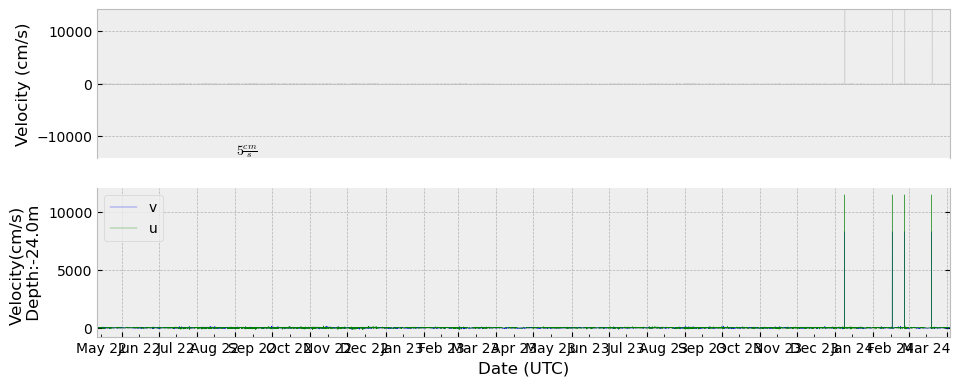

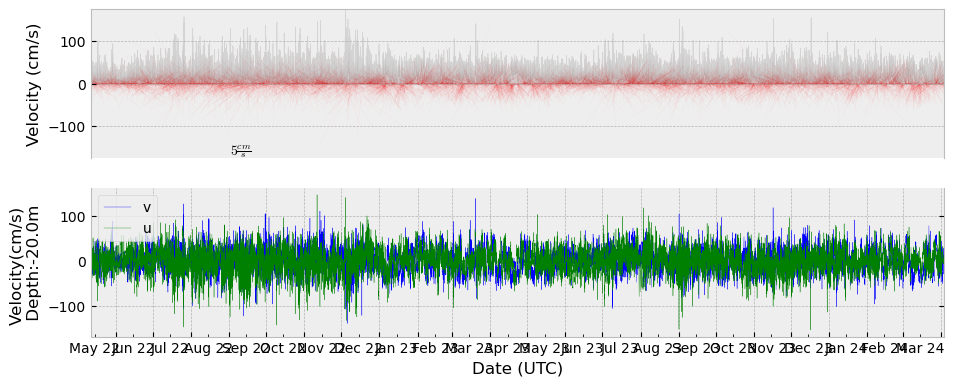

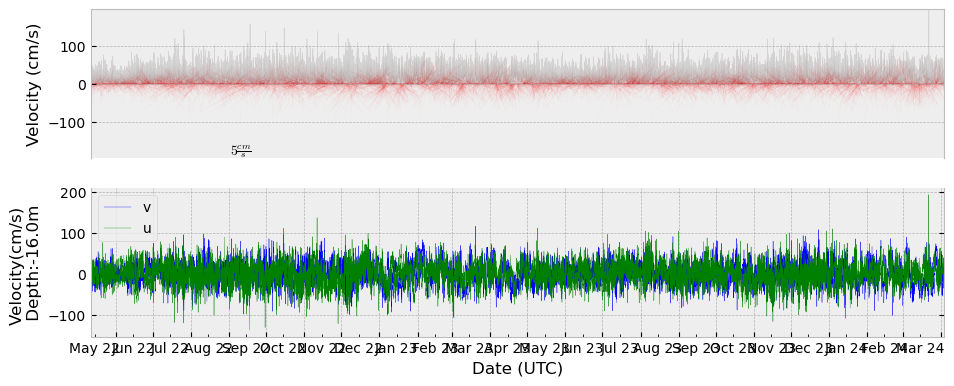

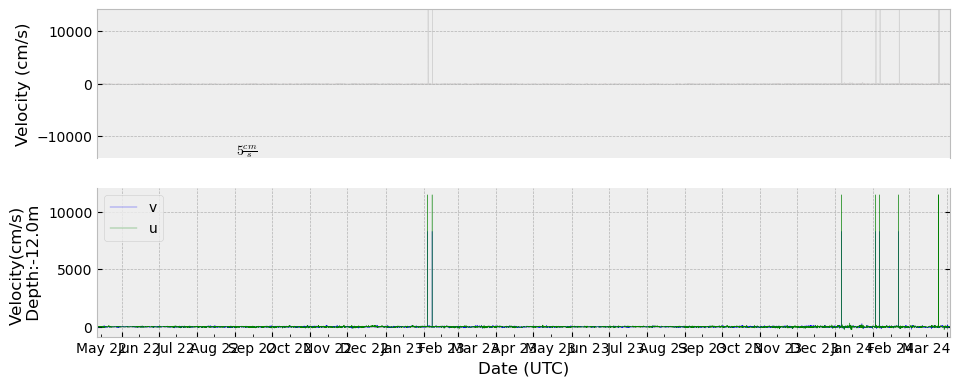

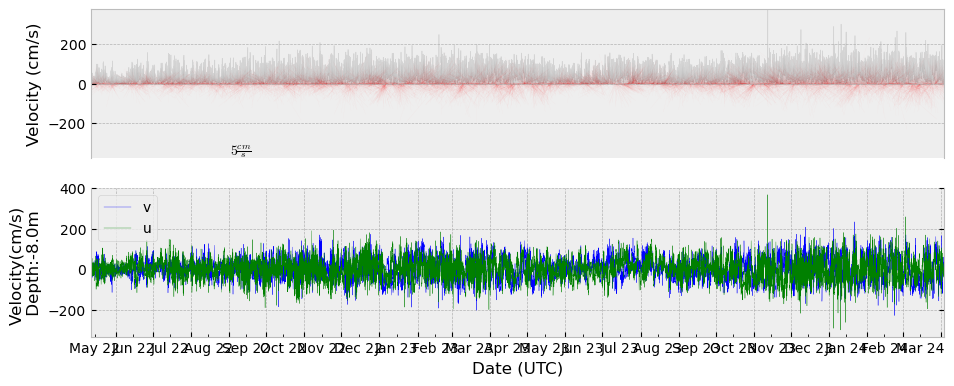

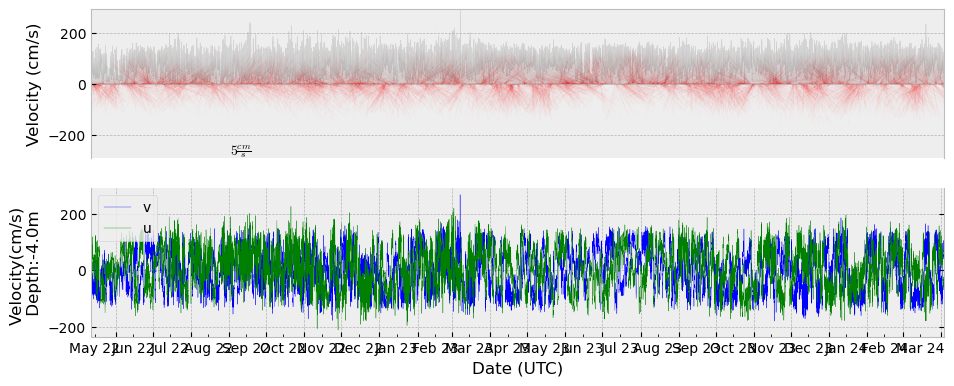

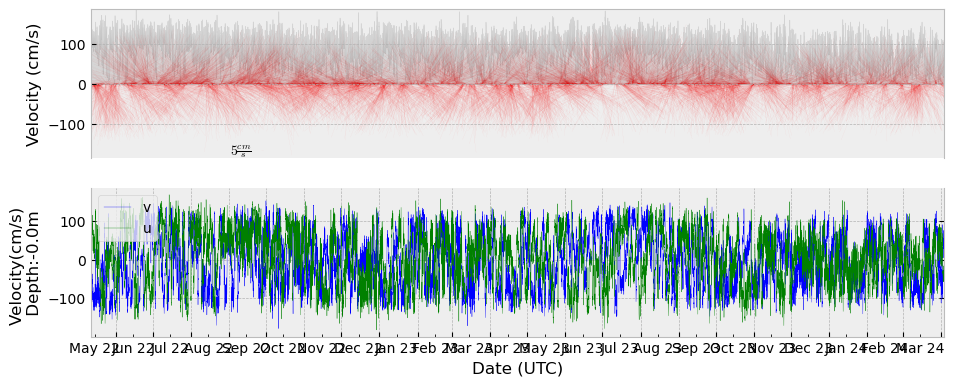

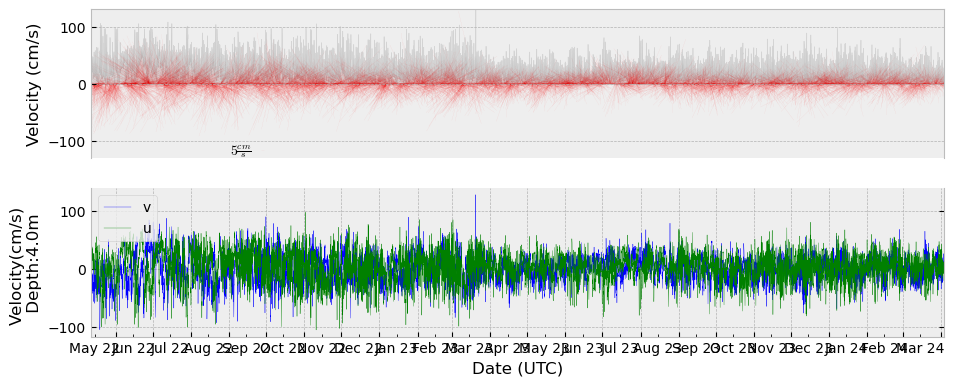

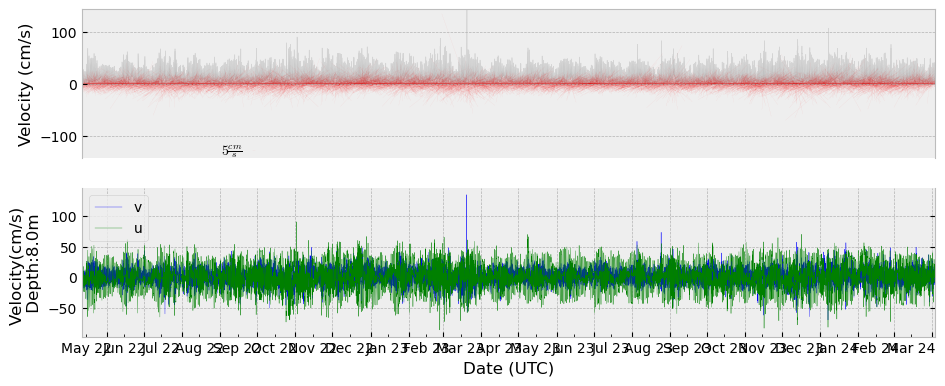

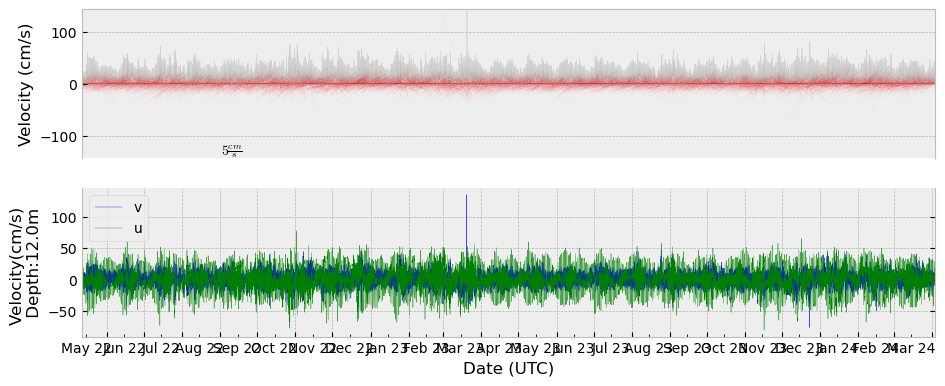

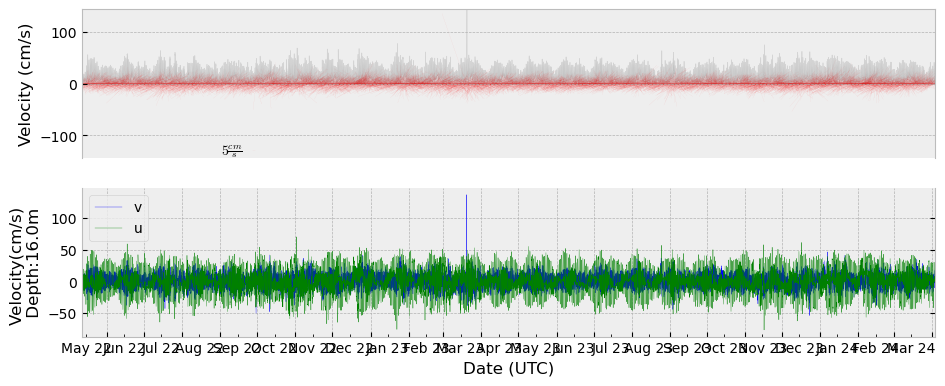

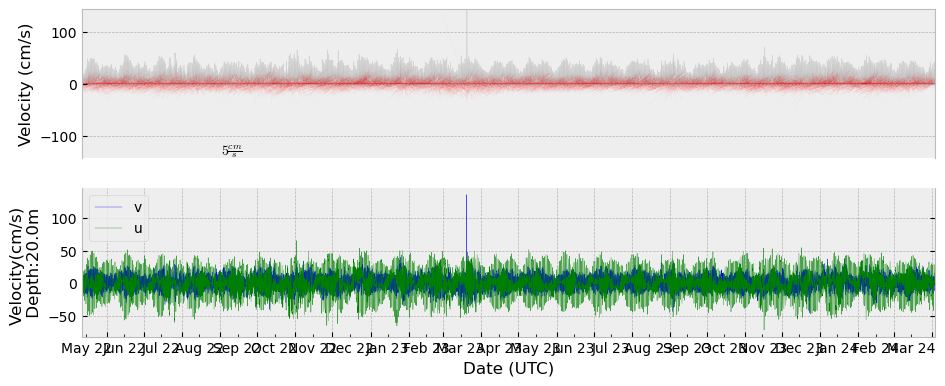

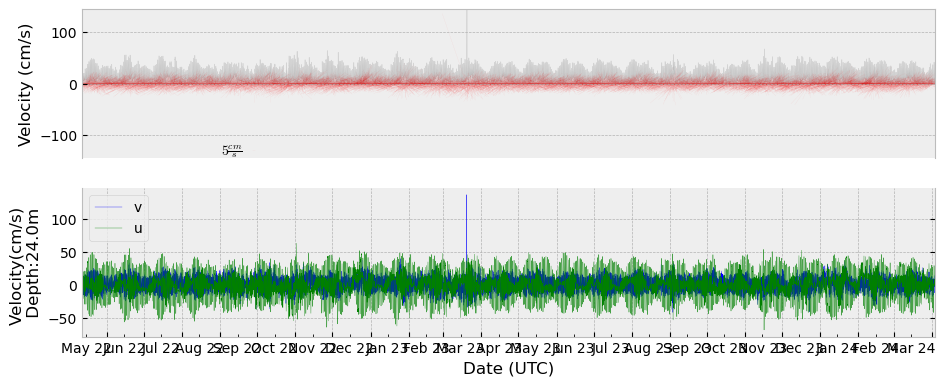

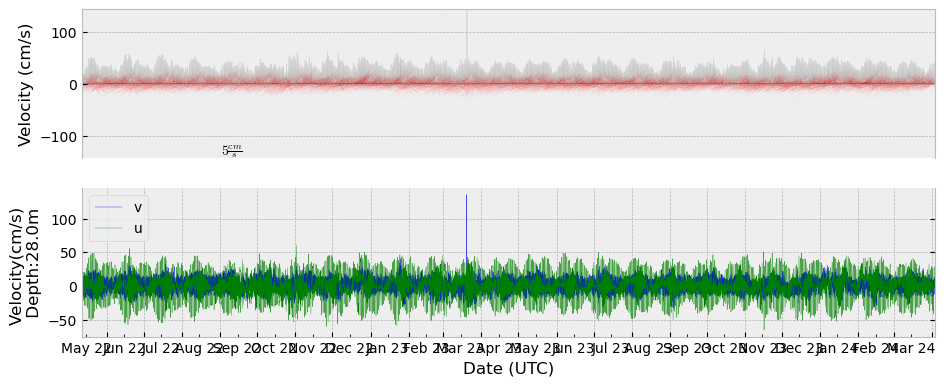

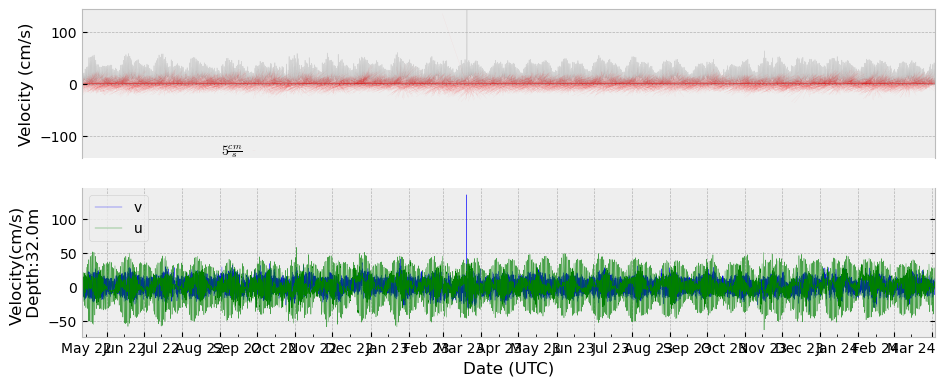

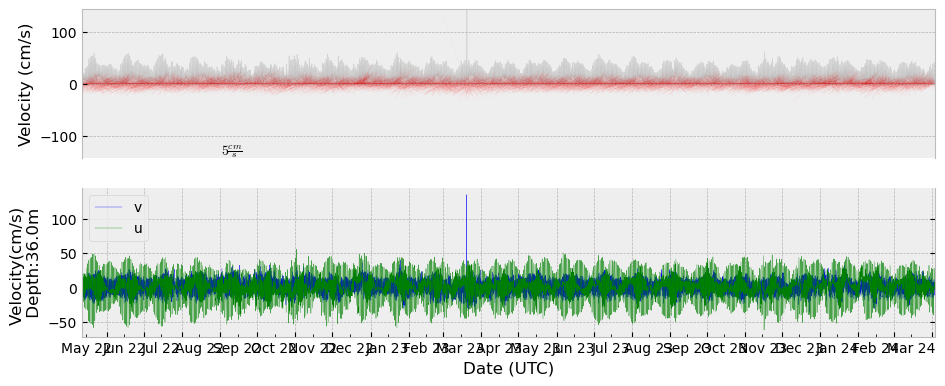

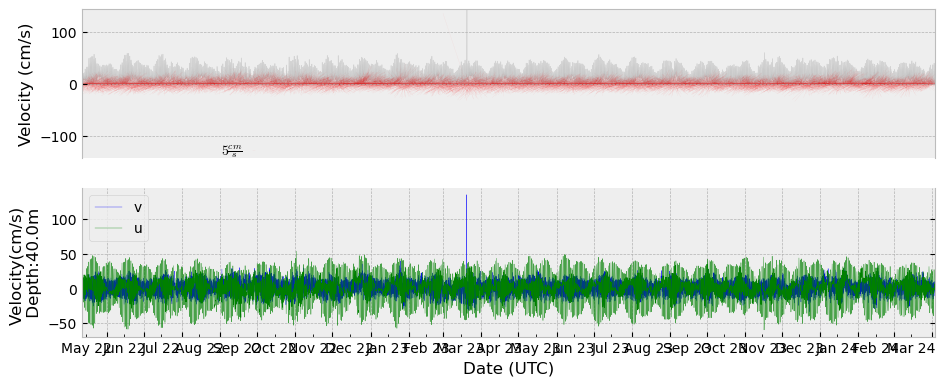

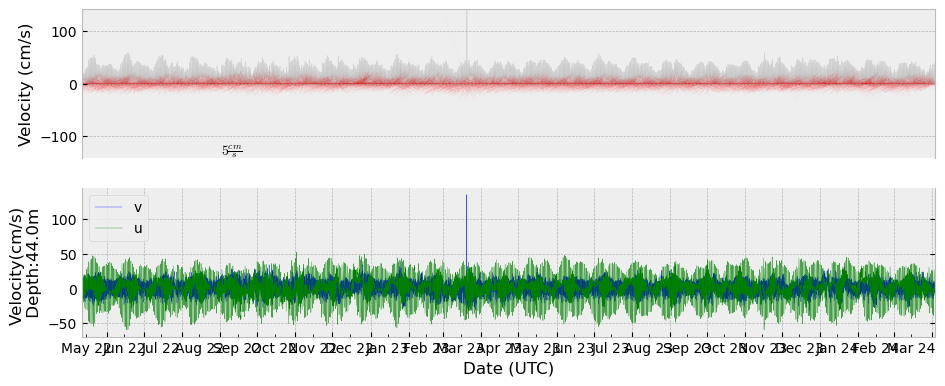

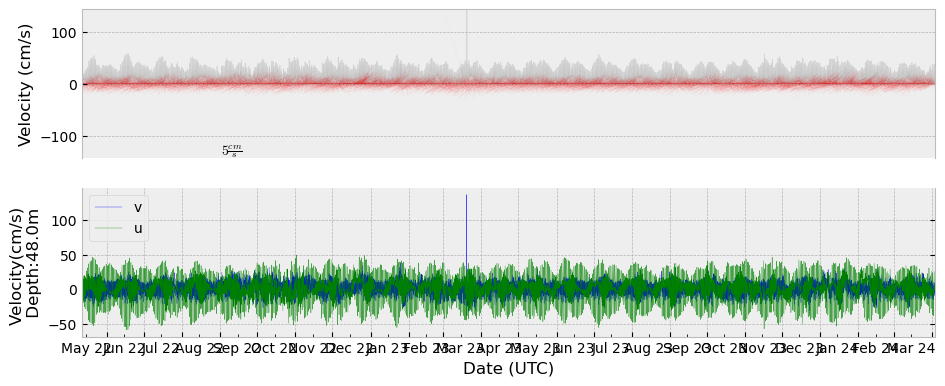

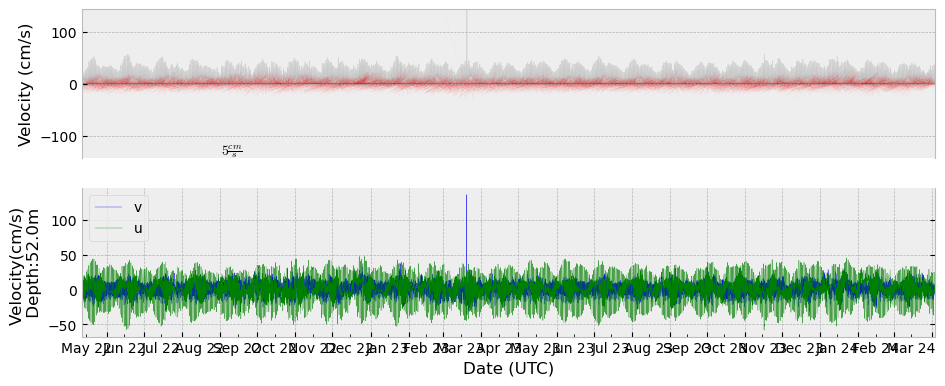

In [4]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [5]:
xdf =xdf.where(np.abs(xdf.v_curr_comp) <=200,np.nan)
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=200,np.nan)

xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 16613, depth: 20)
Coordinates:
  * time             (time) datetime64[ns] 2022-05-11T20:00:00 ... 2024-04-02...
  * depth            (depth) float64 -24.0 -20.0 -16.0 -12.0 ... 44.0 48.0 52.0
  * latitude         (latitude) float64 56.86
  * longitude        (longitude) float64 -164.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 8.074 ... -5.886
    v_curr_comp      (latitude, longitude, time, depth) float64 -3.325 ... -5...
    w_curr_comp      (latitude, longitude, time, depth) float64 -2.5 ... 0.3
    w_curr_comp_err  (latitude, longitude, time, depth) float64 -1.9 ... 0.7
    agc1             (latitude, longitude, time, depth) float64 63.0 ... 127.0
    agc2             (latitude, longitude, time, depth) float64 63.0 ... 134.0
    agc3             (latitude, longitude, time, depth) float64 66.0 ... 141.0
    agc4             (latitude, longitude, time, depth) float64 61.0 ... 121.0
Attributes: (12/13)
    Latitude_DegMMddW:                      56 51.808 N
    Longitude_DegMMddN:                     164 03.693 W
    MooringID:                              22BSP-2A
    platform_deployment_date:               2022-05-11T19:30:00Z
    platform_deployment_cruise_name:        DY2206
    platform_recovery_date:                 2024-04-03T00:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  swap adcp unit from M4 
\n
\nAtte...
    WaterDepth:                             72.0
    date_created:                           2024-10-30T08:34:35Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [6]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

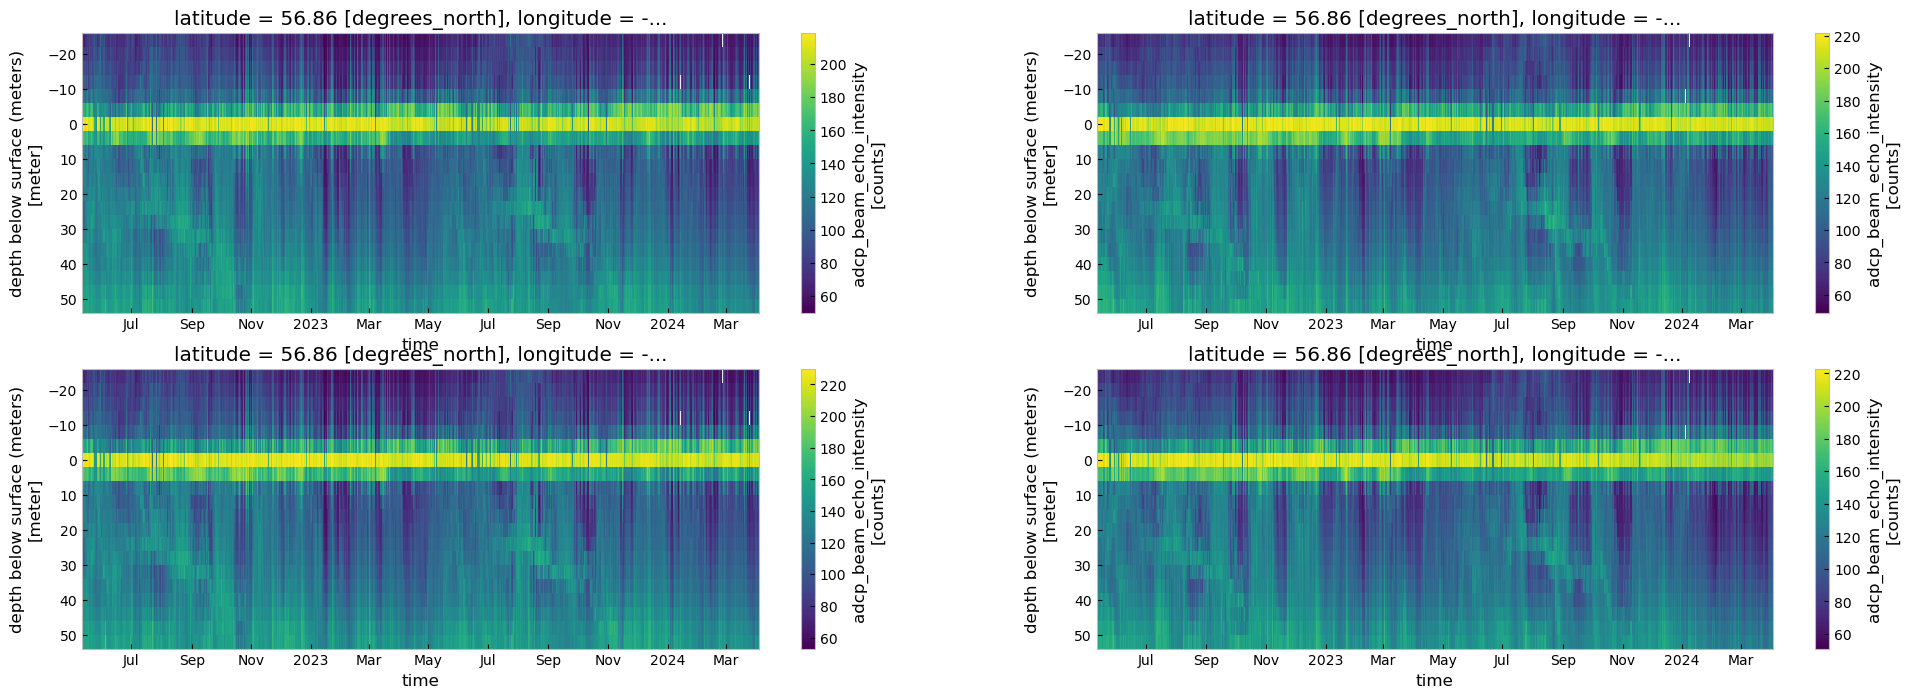

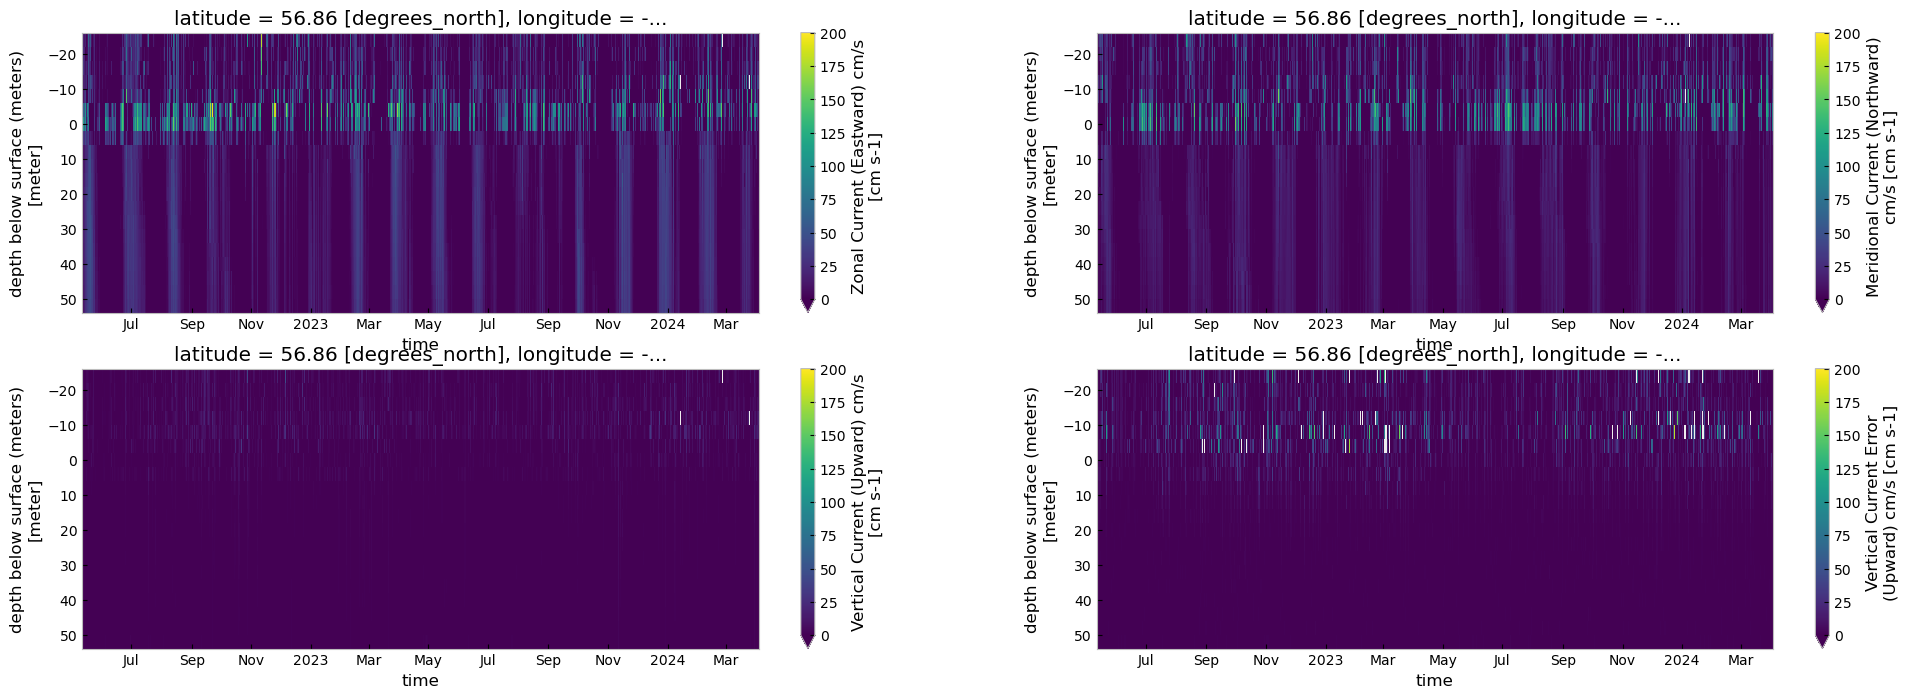

In [7]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [8]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >200cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >200cm/s'    

## Trim above surface (negative values)

In [9]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [10]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [11]:
ixdf.to_netcdf('22bsp2a_velein_0058m.trimmed.nc')

In [12]:
xdf = xa.load_dataset('22bsp2a_velein_0058m.trimmed.nc')

In [13]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [14]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [15]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [16]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

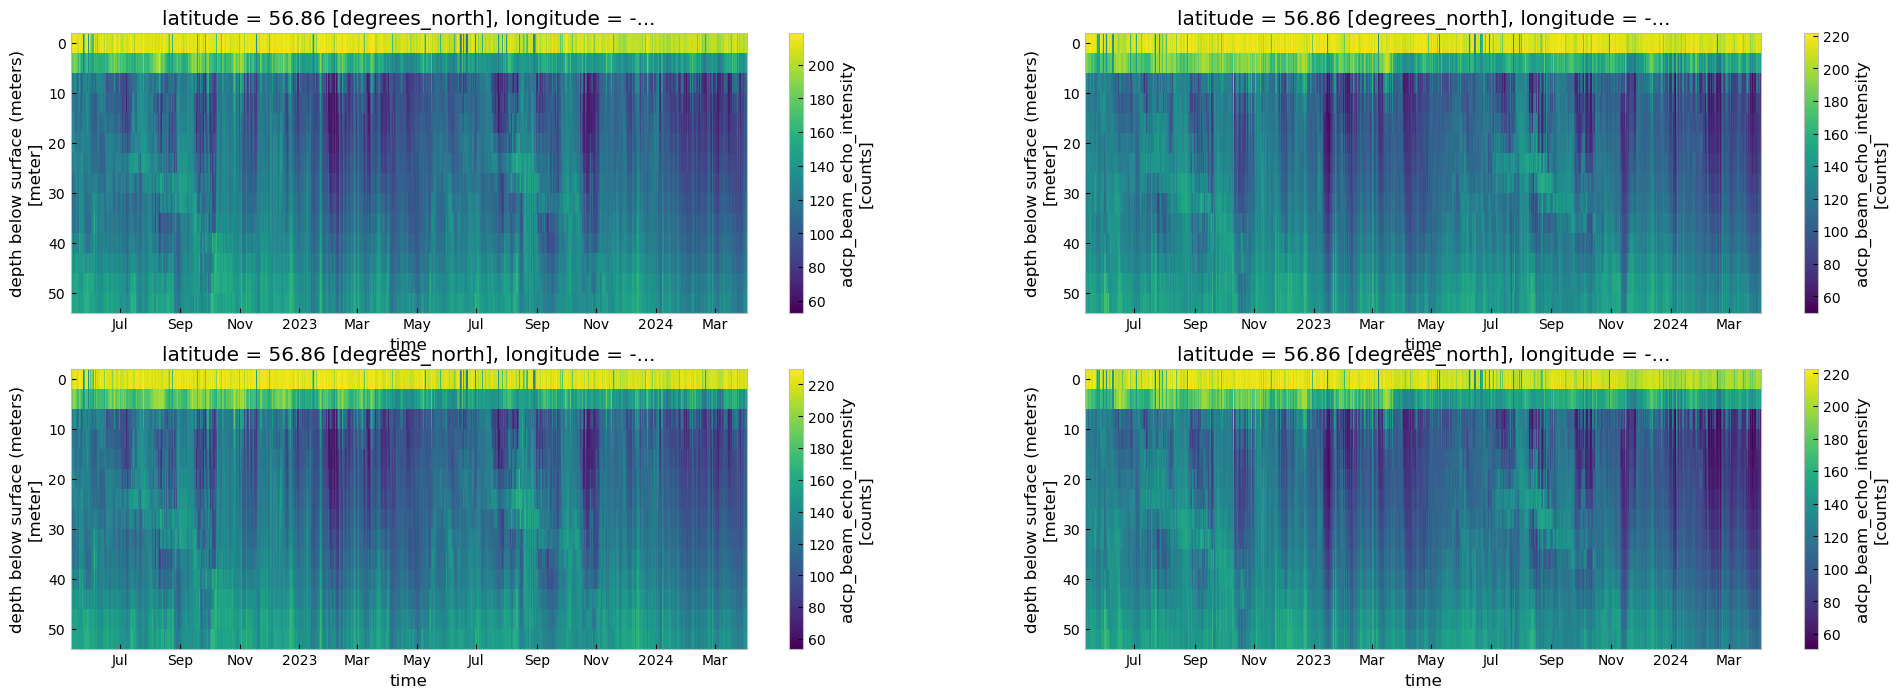

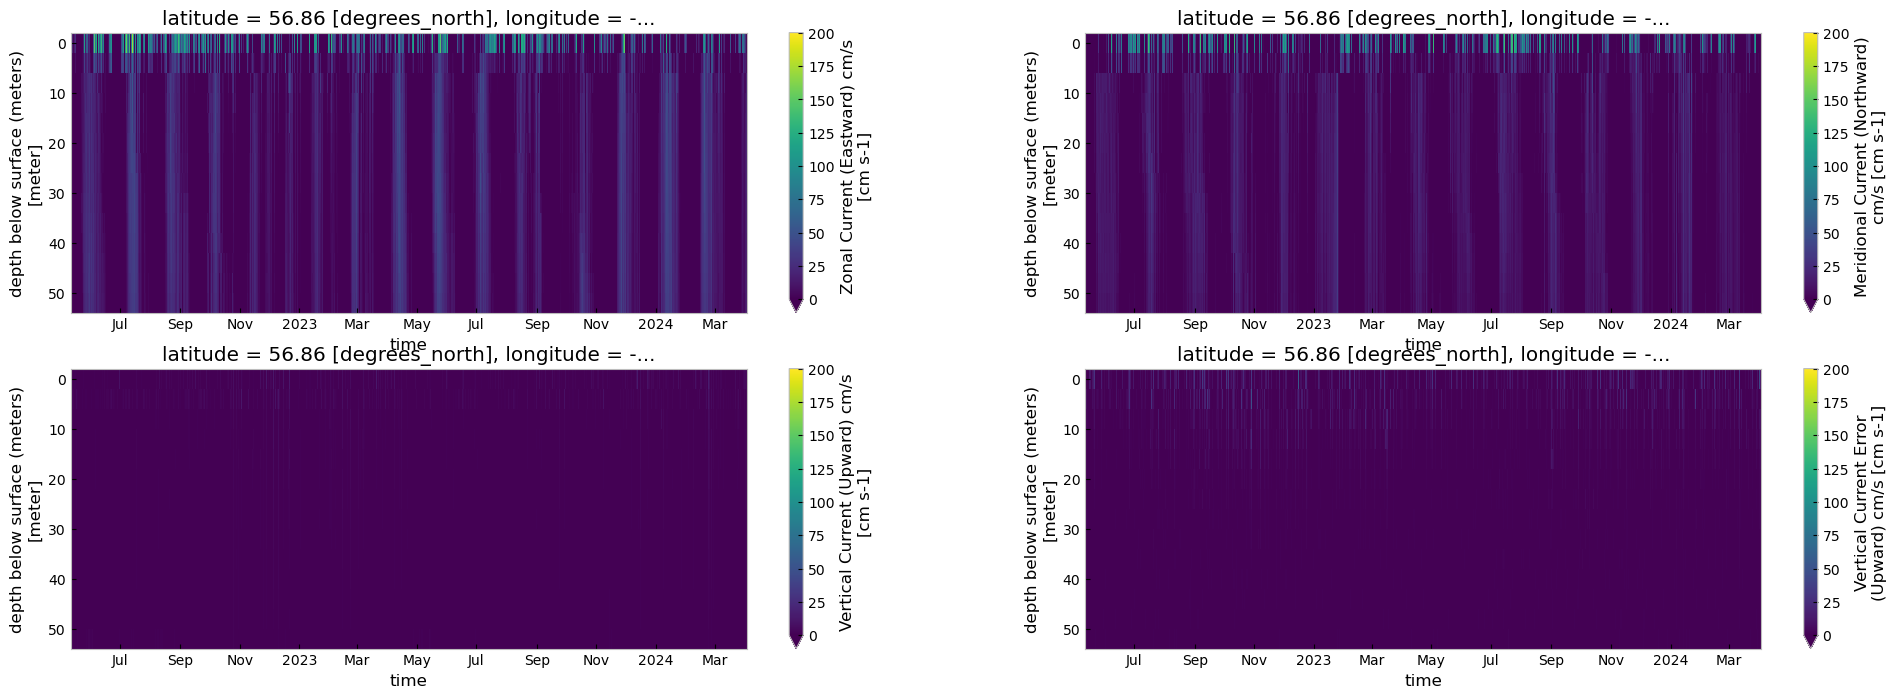

In [17]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [18]:
ixdf.to_netcdf('22bsp2a_velein_0058m.filtered.nc')